1- get the performance of FL : global model accuracy through  rounds

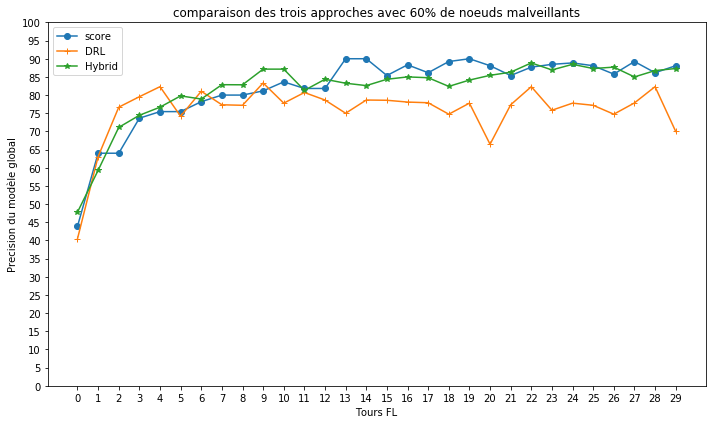

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/score_01_06/models.csv') 
df5 = pd.read_csv('../results/drl_01_06/models.csv') 
df8 = pd.read_csv('../results/hybrid_01_06/models.csv')  # Replace 'your_csv_file.csv' with your actual file name
# df52 = pd.read_csv('../results/score_drp60_mlc10/models.csv') 
# df55 = pd.read_csv('../results/drl_drp60_mlc10/models.csv') 
# df58 = pd.read_csv('../results/hybrid_drp60_mlc10_2/models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

# filtered_df52 = df52[df52['type'] == 2]
# filtered_df52 = filtered_df52[1:]

# filtered_df55 = df55[df55['type'] == 2]
# filtered_df55 = filtered_df55[1:]

# filtered_df58 = df58[df58['type'] == 2]
# filtered_df58 = filtered_df58[1:]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
accuracies5 = filtered_df5['accuracy']
accuracies8 = filtered_df8['accuracy']

# accuracies52 = filtered_df52['accuracy']
# accuracies55 = filtered_df55['accuracy']
# accuracies58 = filtered_df58['accuracy']

index = filtered_df2['round']

# print(accuracies2)
# print(accuracies52)

# # print(accuracies5)
# print(accuracies55)

# # print(accuracies8)
# print(accuracies58)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="score")
plt.plot(index, accuracies5, marker='+', label="DRL")
plt.plot(index, accuracies8, marker='*', label="Hybrid")
# plt.plot(index, accuracies52, marker='o', label="dropout=0.1")
# plt.plot(index, accuracies55, marker='+', label="dropout=0.3")
# plt.plot(index, accuracies58, marker='*', label="dropout=0.6")
plt.title("comparaison des trois approches avec 60% de noeuds malveillants")
plt.xlabel('Tours FL')
plt.ylabel('Precision du modèle global')
plt.yticks(range(0, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import json
import numpy as np
with open("../../../blockchain.json",'r') as f:
    data = json.load(f)

In [4]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# # Print honesty values for each node in a single line
# for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
#     if node_id in honesty_values_dict:
#         honesty_list = honesty_values_dict[node_id]
#         if len(honesty_list)==7 :
#             honesty_list.append(honesty_list[-1])
#         print(f"Node {node_id}: {honesty_list}")
#     else:
#         print(f"Node {node_id}: No honesty values")


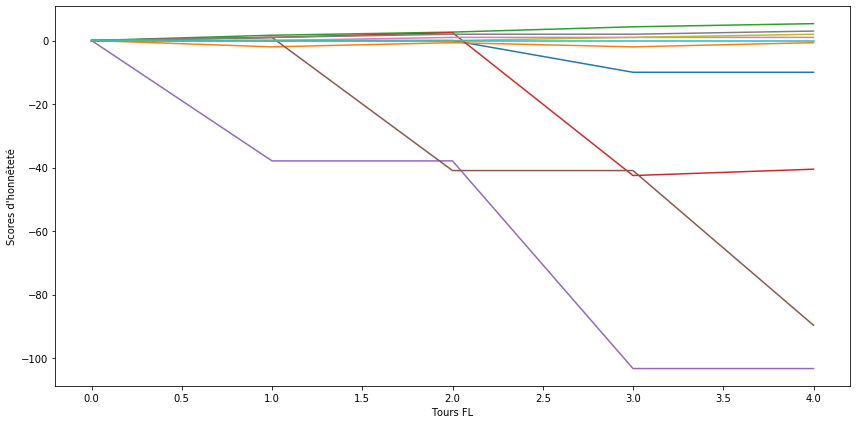

In [5]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))


# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(index, honesty_values, label=f'Node {node_id}')

plt.xlabel('Tours FL')
plt.ylabel("Scores d'honnêteté")
# plt.title('Honesty Values for each Node with Score selection')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

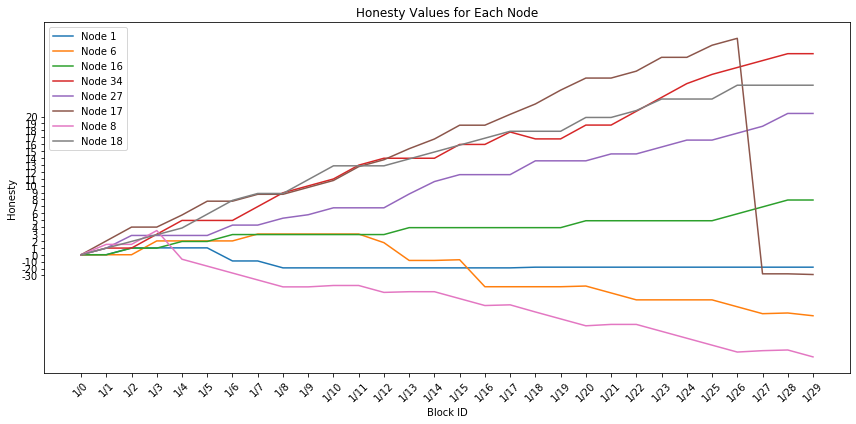

In [16]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

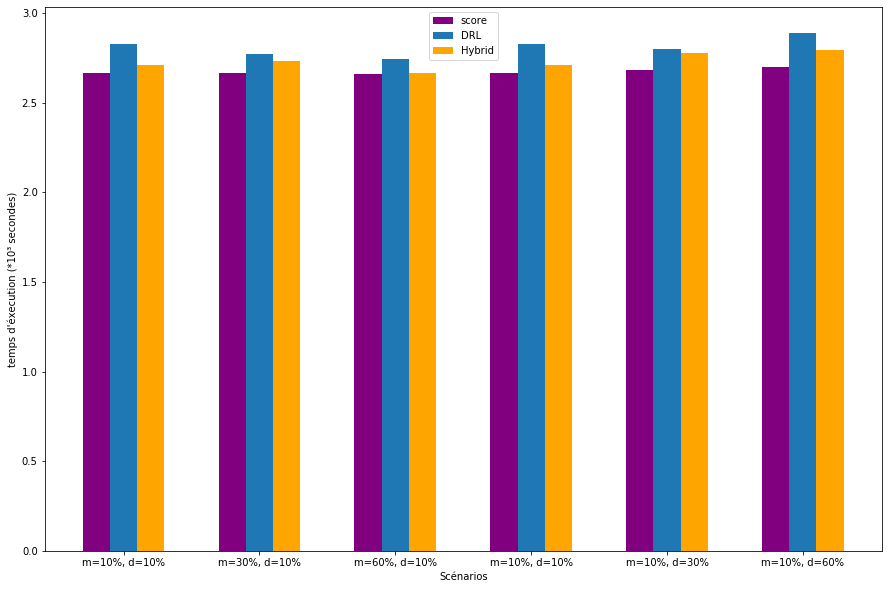

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these lists with your own data)
# 01 01, 0.1 0.3, 0.1 0.6, 0.1 0.1, 0.3 0.1, 0.6 0.1
score = [2.66723, 2.66717, 2.65924, 2.66723, 2.68218, 2.69829] 
drl = [2.82923, 2.77322, 2.74625, 2.82923 , 2.80126, 2.88925]
hybride = [2.71227, 2.73324, 2.66424, 2.71227, 2.77925, 2.79321]

# Create an array of x-values for the bars
x_labels = ["m=10%, d=10%","m=30%, d=10%", "m=60%, d=10%", "m=10%, d=10%", "m=10%, d=30%","m=10%, d=60%"]
x = np.arange(len(score))
# Set the width of the bars
width = 0.2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Create bar plots for each dataset
ax.bar(x - width, score, width, label='score', color="purple")
ax.bar(x, drl, width, label='DRL')
ax.bar(x + width, hybride, width, label='Hybrid', color="orange")

# Set labels for the x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Set the title and labels for the axes
# ax.set_title('Bar Plot of Three Data Sets')
ax.set_xlabel('Scénarios')
ax.set_ylabel("temps d'éxecution (*10³ secondes)")

# Add a legend
ax.legend()

# Show the plot
plt.show()
